## Ⅰ. [한글 분석 + 워드클라우드] 한글 뉴스 기사의 키워드 분석하기

In [ ]:
! pip install konlpy

In [2]:
import json
import re
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud
from konlpy.tag import Okt
# *Okt는 한글 품사 태깅을 위한 모듈이다!

### 1)데이터 준비

In [ ]:
# https://dduniverse.tistory.com/entry/JVMNotFoundException-No-JVM-shared-library-file-jvmdll-found-Try-setting-up-the-JAVAHOME-environment-variable-properlykonlpy를 설치는 정상적으로 되었으나, 형태소 분석기를 사용하려 하자 아래와 같은 JVMNotFoundException이 발생하였다.
# JVMNotFoundException: No JVM shared library file (jvm.dll) found. Try setting up the JAVA_HOME environment variable properly.

In [6]:
inputFileName = '4.3ref/etnews.kr_facebook_2016-01-01_2018-08-01_4차 산업혁명'

# 1. json 파일을 읽어서 json.loads( ) data 객체에 저장, 한글이 깨지지 않도록 utf-8 형식으로 인코딩
data = json.loads(open(inputFileName+'.json', 'r', encoding = 'utf8').read()) # json파일은 josn.loads
data # 확인

# 2. message키의 데이터에서 품사가 명사인 단어만 추출
'''
- re.sub(pattern, repl, string): string 내에서 pattern에 해당하는 모든 부분을 repl로 바꾼다
- 'message' 키의 값(뉴스 본문 내용)에서 문자나 숫자가 아닌 것r'[^\w]'은 공백으로 치환하여(re.sub) 제거하면서, 연결하여 전체를 하나의 문자열로 구성
- r'[^\w]': 이 정규 표현식은 ^\w가 아닌 모든 문자를 찾는다.
    - 여기서 \w는 단어 문자(word character)를 의미하며,
    - ^는 제외표시 = not
'''

message = ''
for item in data:
    if 'message' in item.keys(): # message키가 본문내용
        message += re.sub(r'[^\w]', ' ', item['message'])

message

'6월의 스파크포럼    미래 시대  조직의 변화도 시작됐다    스파크포럼은 현 사회의 사회문제 및 이슈를 제기하고  그 이슈를 혁신적으로 해결하고자 하는 소셜이노베이터를 발굴  지원하여 우리 사회 따뜻한 변화를 확산시키지 위해 만들어진 도전과 만남의 자리입니다   6월의 스파크포럼에서는 4차 산업혁명 시대의 기업조직과 조직문화를 살펴보고  조직의 변화를 받아들이고 실험해나가는 사례를 통해 미래 시대 조직이 나아가야 할 방향을 함께 생각해보고자 합니다 로봇이 4차 산업혁명 주요 성장 동력으로 떠오르면서 국내 로봇 기업에 재평가가 이뤄지고 있다는 분석입니다 4차 산업혁명 시대 금융 산업 전반 점검해야 한다는   공통 간판 공약은  4차 산업혁명 선도 도시 구현 과  가상화폐 블록체인 기술 활용  등입니다  https   goo gl qPEyAJ이번 과정은 4차 산업혁명 핵심 기술인 AI에 대한 통찰력과 알파고를 통해 우리 일상과 익숙해진 로봇  빅데이터 산업 흐름을 알려줍니다   인공지능  최고위과정  산학연최고전문가 https   goo gl jSZSNX4차 산업혁명 모든 기술과 서비스 구현산업혁명의 나라  영국엔 4차 산업혁명이 없다  한국 영국 경험과 지혜를 모으는  미래비즈니스포럼 2017  개최 전자신문TV 라이브  SBA 신직업위크  4차 산업혁명 시대의 경쟁력 확보와 일자리 창출의 해법을 신직업에서 찾고 있는 서울산업진흥원 SBA 이 자신들의 역량과 노력을 모두 담은  제 2회 신직업위크 를 진행하고 있습니다   이번 전자신문TV라이브는 서울 대치동 SBA 신직업교육센터에서 강만구 신직업교육팀장과 서지윤 신직업리서치팀수석  윤석원 테스트웍스 대표 등과 함께  제 2회 신직업위크 와 최신 신직업트렌드를 알아보는 시간으로 마련했습니다  많은 시청 바랍니다     전자신문  전자신문엔터  전자신문TV  라이브  소셜방송  현장라이브  손보련  신직업위크  서울산업진흥원  SBA  신직업  서울  강만구  서지윤  윤석원  테스트웍스  소프트웨어  테스터

### 2)데이터 탐색 및 분석 모델 구축

In [ ]:
# 1. 품사 태깅 패키지인 Okt를 사용하여 명사만 추출해서,  message_N에 저장
nlp = Okt()
message_N = nlp.nouns(message) # nlp.nouns(): 명사만 추출하겠다

message_N

In [15]:
# 2. 단어별 출현 횟수 계산 & 상위 80개 걸러내기
count = Counter(message_N)
count.most_common(20)

word_count = dict()
for tag,counts in count.most_common(80):
    if len(str(tag)) > 1: # ?글자 1개는 x -> why? -> 주제에 맞게 choice
        word_count[tag] = counts
        print("%s: %d" %(tag,counts))
    # len(str(tag)) = 1 -> [차,위,창,터,등,철,제,를,강,팀,현,및]

산업혁명: 22
전자신문: 13
산업: 10
직업: 10
기술: 8
시대: 7
라이브: 7
이번: 6
진흥: 6
포럼: 5
일자리: 5
조직: 4
통해: 4
진행: 4
스파크: 3
미래: 3
변화: 3
사회: 3
기업: 3
로봇: 3
노력: 3
서울: 3
시간: 3
방송: 3
대응: 3
주형: 3
전자: 3
정보: 3
이슈: 2
소셜: 2
우리: 2
위해: 2
사례: 2
주요: 2
국내: 2
활용: 2
과정: 2
빅데이터: 2
흐름: 2
최고: 2
서비스: 2
영국: 2
한국: 2
경쟁력: 2
교육: 2
만구: 2
지윤: 2
윤석: 2
테스트: 2
웍스: 2
대표: 2
시청: 2
현장: 2
소프트웨어: 2
테스: 2
가장: 2
과제: 2
대표이사: 2
공공기관: 2
중소기업: 2
모시: 2
국정: 2
컨퍼런스: 2
행사: 2
페이스북: 2
대비: 2
시작: 1
문제: 1


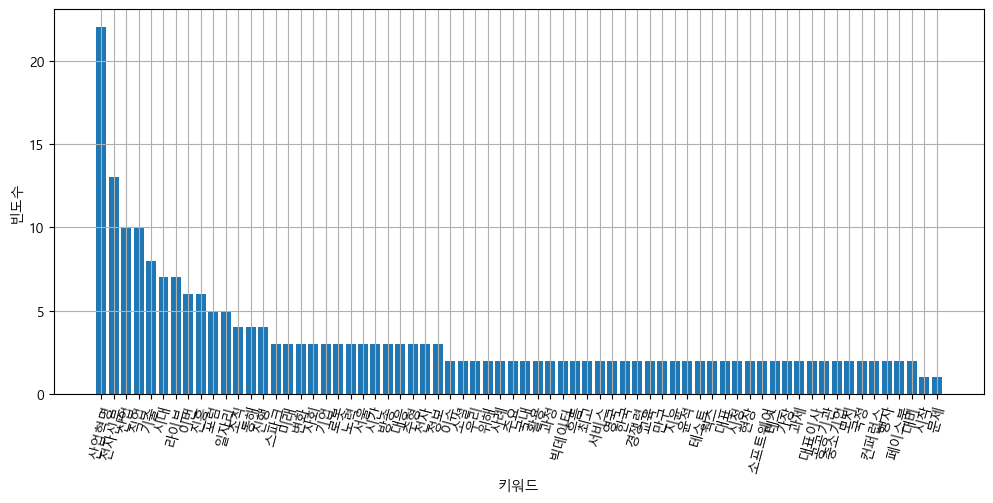

In [16]:
# 3. 히스토그램을 그려 단어 빈도를 시각적으로 탐색

# 히스토그램에 레이블을 한글로 표시하기 위해 한글 폰트인 맑은고딕체malgun.ttf를 설정 - matplotlib.rc( ) 
font_path = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
matplotlib.rc('font', family = font_name)

plt.figure(figsize=(12,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_keys = sorted(word_count, key=word_count.get, reverse=True) # word_count하면 되네
sorted_values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_values, align='center')
plt.xticks(range(len(word_count)), list(sorted_keys), rotation=75)
plt.show()

### 3)결과 시각화

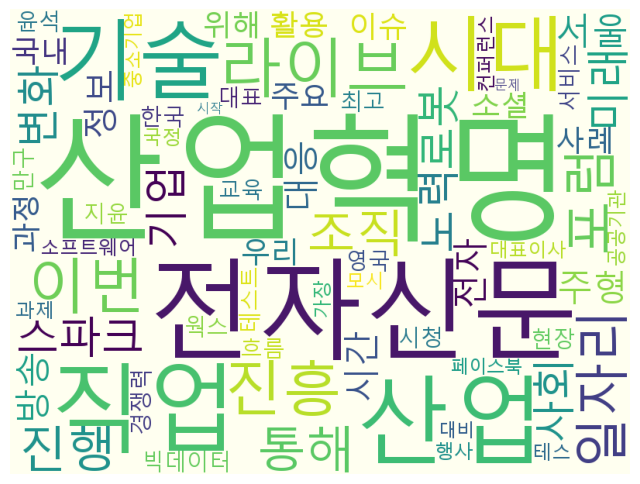

In [18]:
wc = WordCloud(font_path, background_color = 'ivory', width = 800, height = 600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

cloud.to_file(inputFileName + '_cloud.jpg') # 저장

## Ⅱ. [한글 분석 + 워드클라우드] 한글 뉴스 기사의 키워드 분석하기

In [ ]:
import json
import re
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud
from konlpy.tag import Okt